Tarea 5 Diego Garavito

In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

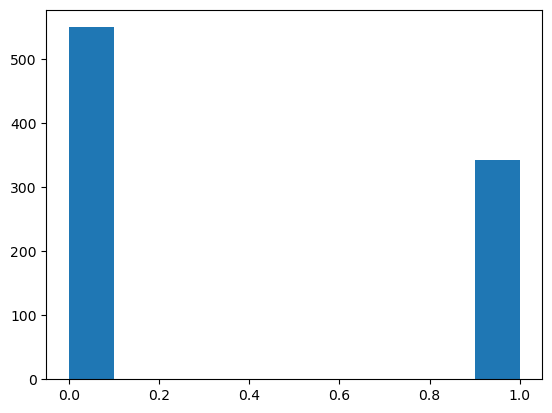

In [197]:
plt.hist(data.Survived)

<Axes: xlabel='Pclass', ylabel='Age'>

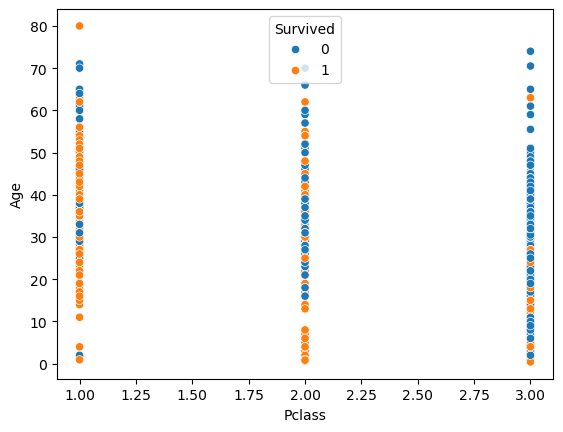

In [27]:
sns.scatterplot(x = "Pclass", y = "Age", hue = "Survived", data = data)

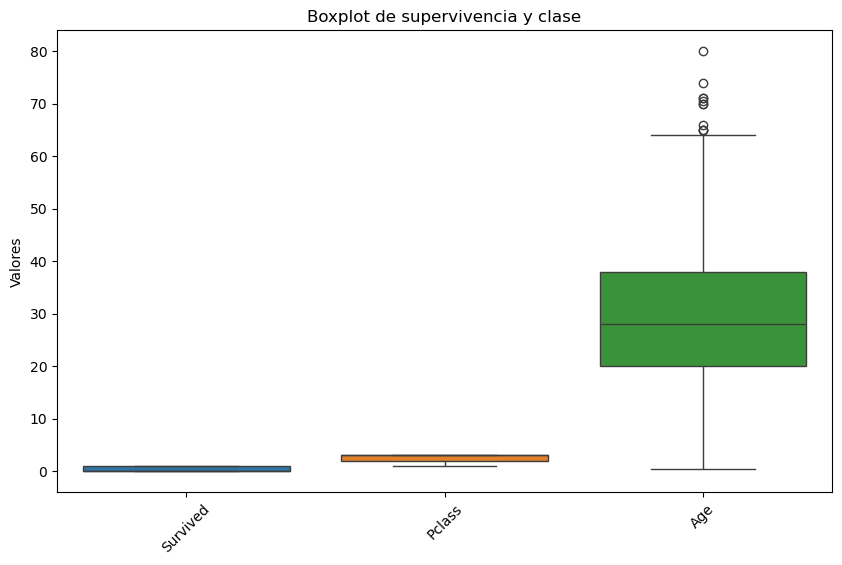

In [199]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Survived', 'Pclass', 'Age']])
plt.xticks(rotation=45)
plt.title('Boxplot de supervivencia y clase')
plt.ylabel('Valores')
plt.show()

In [271]:
predictors_col = ["Age", "Survived","SibSp","Fare"]
target_col = ['Pclass']

In [273]:
predictors = data[predictors_col]
target = data[target_col]

In [275]:
predictors

,Age,Survived,SibSp,Fare
0,22.0,0,1,7.2500
1,38.0,1,1,71.2833
2,26.0,1,0,7.9250
3,35.0,1,1,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,1,0,30.0000
888,NaN,0,1,23.4500
889,26.0,1,0,30.0000


In [305]:
target

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [279]:
corr = predictors.corr()
corr

,Age,Survived,SibSp,Fare
Age,1.000000,-0.077221,-0.308247,0.096067
Survived,-0.077221,1.000000,-0.035322,0.257307
SibSp,-0.308247,-0.035322,1.000000,0.159651
Fare,0.096067,0.257307,0.159651,1.000000


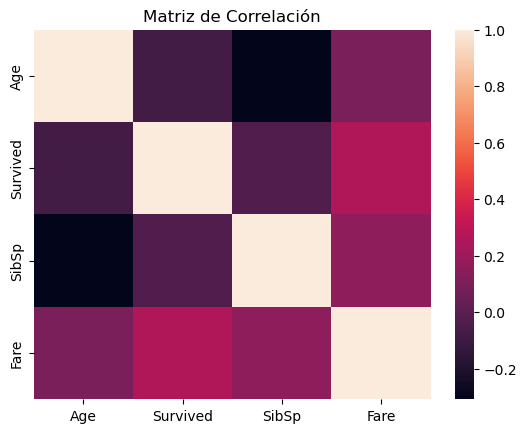

In [281]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [283]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [285]:
tree = DecisionTreeClassifier()

In [287]:
arbol = tree.fit(X_train, y_train)

[Text(0.4603494623655914, 0.96875, 'x[3] <= 25.527\ngini = 0.601\nsamples = 712\nvalue = [179.0, 148.0, 385.0]'),
 Text(0.2110215053763441, 0.90625, 'x[3] <= 10.481\ngini = 0.348\nsamples = 440\nvalue = [5, 92, 343]'),
 Text(0.33568548387096775, 0.9375, 'True  '),
 Text(0.10752688172043011, 0.84375, 'x[3] <= 5.619\ngini = 0.074\nsamples = 264\nvalue = [5, 5, 254]'),
 Text(0.08602150537634409, 0.78125, 'x[0] <= inf\ngini = 0.667\nsamples = 15\nvalue = [5, 5, 5]'),
 Text(0.06451612903225806, 0.71875, 'x[0] <= 29.0\ngini = 0.494\nsamples = 9\nvalue = [4, 0, 5]'),
 Text(0.043010752688172046, 0.65625, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.08602150537634409, 0.65625, 'x[0] <= 44.5\ngini = 0.444\nsamples = 6\nvalue = [4, 0, 2]'),
 Text(0.06451612903225806, 0.59375, 'x[0] <= 37.0\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(0.043010752688172046, 0.53125, 'x[0] <= 34.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.021505376344086023, 0.46875, 'gini = 0.0\nsamp

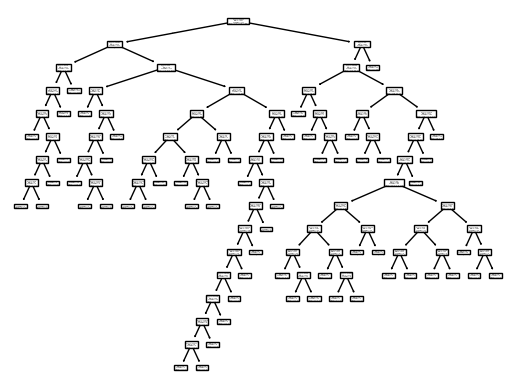

In [289]:
plot_tree(arbol)

In [291]:
predicciones = arbol.predict(X_test)

In [293]:
predicciones

array([1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 1, 2, 1, 3, 3, 1,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 3, 1,
       3, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 2, 1, 1, 1, 3, 3, 3, 2, 2, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 1, 3,
       3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 2,
       1, 3, 2], dtype=int64)

In [295]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])


Predicciones,1,2,3
Actual,,,
1,35,1,1
2,3,30,3
3,2,6,98


In [297]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.9106145251396648

In [299]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.912890091866431

In [301]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.9106145251396648

In [303]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.911229162664075

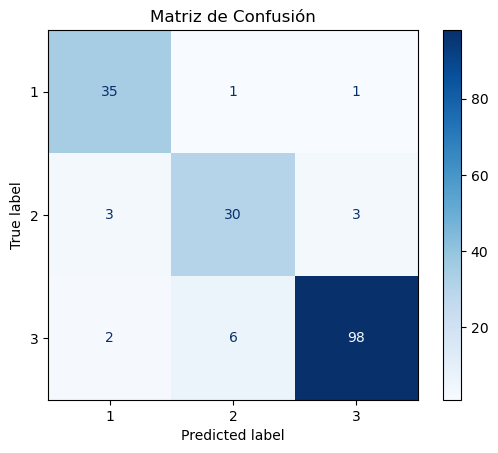

In [307]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión")
plt.show()


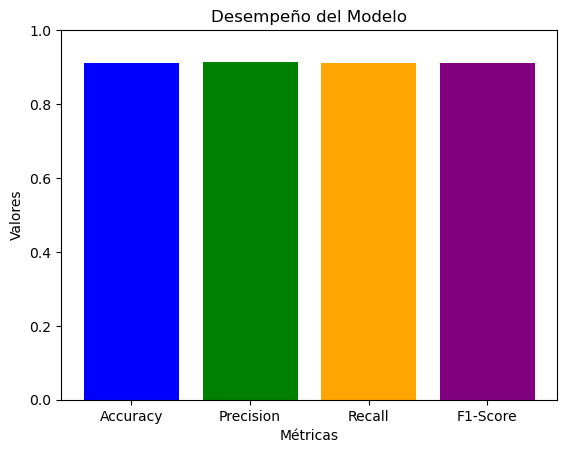

In [309]:
import matplotlib.pyplot as plt

# Métricas
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
valores = [accuracy, precision, recall, f1]

# Crear el gráfico de barras
plt.bar(metricas, valores, color=['blue', 'green', 'orange', 'purple'])
plt.ylim(0, 1)  # Limitar el eje Y entre 0 y 1
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Desempeño del Modelo')
plt.show()
